# Exoplanets HW2
## Miles Currie and 

In [2]:
using Pkg
Pkg.add("PyPlot")
using DelimitedFiles
using PyPlot;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %==========>                              ]  23.4 %]  46.7 % [=============================>           ]  70.2 %  ]  93.4 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


┌ Info: Recompiling stale cache file /Users/mcurr/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


In [3]:
function load_data(fl_path)
    data = readdlm(fl_path)
    return data
end;

In [4]:
# load data
data_fl = "./mystery_planet02.txt"
data = load_data(data_fl)

# unpack data
time, flux, flux_err = data[:, 1], data[:, 2], data[:, 3];

# Overlap Area of Two Circles

![Image](./overlap.pdf)

### $ A_{\mathrm{overlap}} = A_{\mathrm{occultor}} + A_{\mathrm{emitter}} - A_{\mathrm{kite}} $

### $ A_{\mathrm{occultor}} = R_{\mathrm{occultor}} \kappa_0 =  R_{\mathrm{occultor}}^2 \arccos{\frac{b^2 + R_{\mathrm{occultor}}^2 - R_{\mathrm{emitter}}^2}{2 b R_{\mathrm{occultor}}}}  $


### $ A_{\mathrm{emitter}} = R_{\mathrm{emitter}} \kappa_1 = R_{\mathrm{emitter}}^2 \arccos{\frac{b^2 + R_{\mathrm{emitter}}^2 - R_{\mathrm{occultor}}^2}{2 b R_{\mathrm{emitter}}}}  $

### $ A_{\mathrm{kite}} = \frac{1}{2} \sqrt{(-b + R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) (b + R_{\mathrm{occultor}} - R_{\mathrm{emitter}}) (b - R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) (b + R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) } $


### $ A_{\mathrm{overlap}} = R_{\mathrm{occultor}}^2 \arccos{\frac{b^2 + R_{\mathrm{occultor}}^2 - R_{\mathrm{emitter}}^2}{2 b R_{\mathrm{occultor}}}} + R_{\mathrm{emitter}}^2 \arccos{\frac{b^2 + R_{\mathrm{emitter}}^2 - R_{\mathrm{occultor}}^2}{2 b R_{\mathrm{emitter}}}} - \frac{1}{2} \sqrt{(-b + R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) (b + R_{\mathrm{occultor}} - R_{\mathrm{emitter}}) (b - R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) (b + R_{\mathrm{occultor}} + R_{\mathrm{emitter}}) } $

In [5]:
function overlap_area(separation, r_occultor, r_emitter)
    
    area = (r_occultor^2 * arccos((separation^2 + r_occultor^2 - r_emitter^2) / (2*separation*r_occultor))
        + r_emitter^2 * arccos((separation^2 + r_emitter^2 - r_occultor^2) / (2*separation*r_emitter))
        - 0.5 * sqrt((-separation + r_occultor + r_emitter) * (separation + r_occultor - r_emitter)
            * (separation - r_occultor + r_emitter) * (separation + r_occultor + r_emitter)))
    return area
end


overlap_area (generic function with 1 method)

# Periodogram

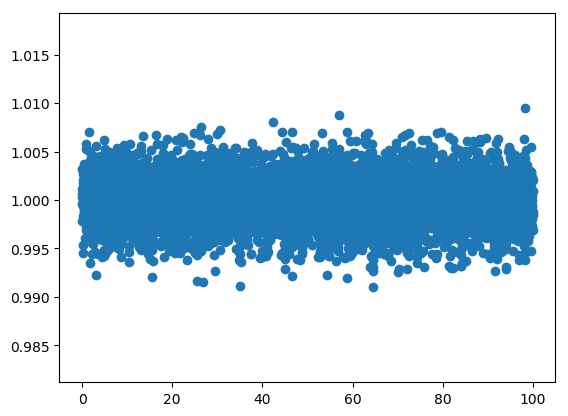

(5000,)

In [6]:
print(size(flux))
figure()
scatter(time, flux)
show();


In [7]:
function get_phase(time, P)
    phase = (time ./ P) .% 1
    return phase
end;

In [8]:
function compute_scatter(rv_by_phase)
    N = size(rv_by_phase)[1]
    scatter = 0
    for i in range(1, stop=N - 1)
        scatter = scatter + (rv_by_phase[i] - rv_by_phase[i + 1])^2
    end
    return scatter
end;

In [9]:
function periodogram(rv_data, times_data, P_vals)
    scatters_list = []
    for period in P_vals
        phase = get_phase(times_data, period)
        phase_sorted_inds = sortperm(phase)
        rv_by_phase = rv_data[phase_sorted_inds]
        rv_scatter = compute_scatter(rv_by_phase)
        append!(scatters_list, rv_scatter)
        
    end
    return scatters_list
end;